In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

from mpl_toolkits.mplot3d import Axes3D

In [2]:
import tensorflow

In [3]:
data = pd.read_csv(r'C:\Users\thuyd\Desktop\bootcamp\Project 4\DNEdited_weekly_rigs_and_oil_price.csv')

d_time = data['Date'] #time
d_rigs = data['Rigs_Count'] #rigs count column, y, index: 0
d_price_WTI = data['WTI_Oil_Price'] #price column, x, index: 1
d_price_Brent = data['Brent_Oil_Price']

data.set_index('Date',inplace = True)

train = data.iloc[100:700,[0,2]]
test = data.iloc[0:100,[0,2]]
train = pd.DataFrame(train)
test = pd.DataFrame(test)

train.set_index('WTI_Oil_Price',inplace = True)
test.set_index('WTI_Oil_Price',inplace = True)

In [4]:
#data.head()
#train.head()
train

,Rigs_Count
WTI_Oil_Price,
72.84,1054
70.28,1053
68.96,1055
68.51,1048
69.66,1048
...,...
63.82,1747
65.26,1747
63.06,1769


C:\Users\thuyd\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

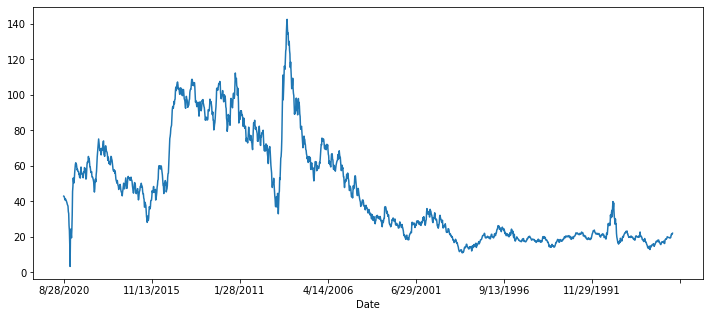

In [5]:
data['WTI_Oil_Price'].plot(figsize=(12,5))

C:\Users\thuyd\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

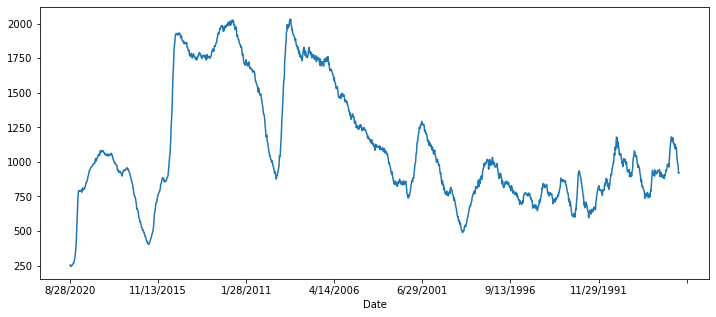

In [6]:
data['Rigs_Count'].plot(figsize=(12,5))

In [7]:
#Axes3D.scatter(d_price_WTI, d_rigs, zs=0, zdir='z', s=20, c=None, depthshade=True)

# d_time = data['Date'] #time
# d_rigs = data['Rigs_Count'] #rigs count column, y, index: 0
# d_price_WTI = data['WTI_Oil_Price'] #price column, x, index: 1
# d_price_Brent

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()#this is a must
scaler.fit(train)#scaler only takes dataframe intead of series

MinMaxScaler()

In [9]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

<AxesSubplot:xlabel='WTI_Oil_Price'>

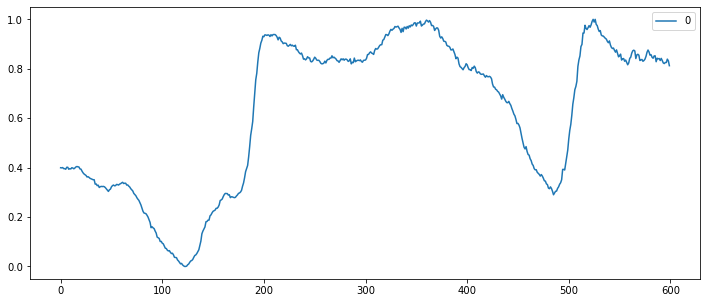

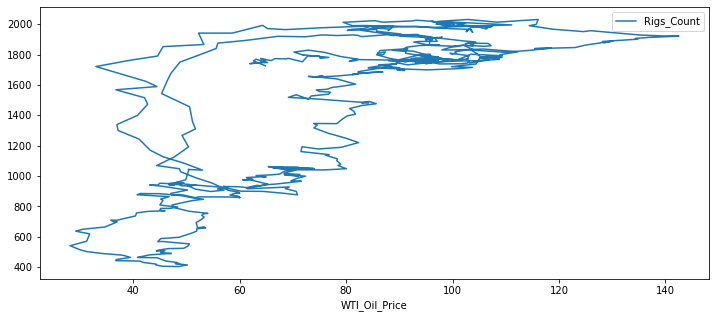

In [10]:
df_scaled_train = pd.DataFrame(scaled_train)
df_scaled_train.plot(figsize=(12,5))
train.plot(figsize=(12,5))


In [11]:
from keras.preprocessing.sequence import TimeseriesGenerator #what is this

In [12]:
# define generator, equally spaced data rows
n_input = 20
n_features = 1
#batch size too large will overfit
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [13]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.3995083  0.39889367 0.40012293 0.39582053 0.39582053 0.39336202
 0.40135218 0.40135218 0.39336202 0.39582053 0.39459127 0.3995083
 0.39827904 0.3952059  0.39827904 0.40258144 0.40442532 0.40319607
 0.40258144 0.39459127]
Predict this y: 
 [[0.39397664]]


In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

In [15]:
n_input = 50
n_features = 1
#batch size too large will overfit
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [16]:
model = Sequential()
model.add(LSTM(150, activation='relu', return_sequences = True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))

model.add(LSTM(150, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(150, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(150))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 150)           91200     
_________________________________________________________________
dropout (Dropout)            (None, 50, 150)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 150)           180600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 150)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 150)           180600    
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 150)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 150)               1

In [20]:
model.fit_generator(train_generator,epochs=20)

Epoch 1/20
550/550 [==============================] - 44s 81ms/step - loss: 0.0123
Epoch 2/20
550/550 [==============================] - 45s 83ms/step - loss: 0.0076
Epoch 3/20
550/550 [==============================] - 43s 78ms/step - loss: 0.0059
Epoch 4/20
550/550 [==============================] - 42s 77ms/step - loss: 0.0060
Epoch 5/20
550/550 [==============================] - 42s 77ms/step - loss: 0.0047
Epoch 6/20
550/550 [==============================] - 44s 80ms/step - loss: 0.0046
Epoch 7/20
550/550 [==============================] - 44s 80ms/step - loss: 0.0053
Epoch 8/20
550/550 [==============================] - 46s 83ms/step - loss: 0.0044
Epoch 9/20
550/550 [==============================] - 42s 76ms/step - loss: 0.0043
Epoch 10/20
550/550 [==============================] - 38s 70ms/step - loss: 0.0039
Epoch 11/20
550/550 [==============================] - 40s 72ms/step - loss: 0.0042
Epoch 12/20
550/550 [==============================] - 39s 71ms/step - loss: 0.0036
E

In [21]:
model.history.history.keys()

dict_keys(['loss'])

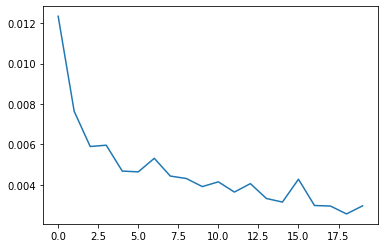

In [22]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

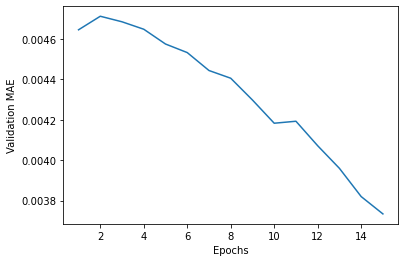

In [23]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(loss_per_epoch[5:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [33]:
# 10 history steps --> step 13
# last 10 points in train --> pt 1 in test data
first_eval_batch = scaled_train[-n_input:]

In [24]:
scaled_train

array([[0.3995083 ],
       [0.39889367],
       [0.40012293],
       [0.39582053],
       [0.39582053],
       [0.39336202],
       [0.40135218],
       [0.40135218],
       [0.39336202],
       [0.39582053],
       [0.39459127],
       [0.3995083 ],
       [0.39827904],
       [0.3952059 ],
       [0.39827904],
       [0.40258144],
       [0.40442532],
       [0.40319607],
       [0.40258144],
       [0.39459127],
       [0.39397664],
       [0.38598648],
       [0.37922557],
       [0.37430854],
       [0.3712354 ],
       [0.36816226],
       [0.36201598],
       [0.36324524],
       [0.3601721 ],
       [0.35648433],
       [0.35464044],
       [0.35279656],
       [0.35095267],
       [0.35095267],
       [0.33312846],
       [0.33374309],
       [0.32698218],
       [0.32882606],
       [0.31960664],
       [0.32267978],
       [0.32390904],
       [0.32329441],
       [0.32390904],
       [0.32267978],
       [0.31899201],
       [0.31407498],
       [0.30915796],
       [0.303

In [26]:
first_eval_batch

array([[0.3995083 ],
       [0.39889367],
       [0.40012293],
       [0.39582053],
       [0.39582053],
       [0.39336202],
       [0.40135218],
       [0.40135218],
       [0.39336202],
       [0.39582053],
       [0.39459127],
       [0.3995083 ],
       [0.39827904],
       [0.3952059 ],
       [0.39827904],
       [0.40258144],
       [0.40442532],
       [0.40319607],
       [0.40258144],
       [0.39459127],
       [0.39397664],
       [0.38598648],
       [0.37922557],
       [0.37430854],
       [0.3712354 ],
       [0.36816226],
       [0.36201598],
       [0.36324524],
       [0.3601721 ],
       [0.35648433],
       [0.35464044],
       [0.35279656],
       [0.35095267],
       [0.35095267],
       [0.33312846],
       [0.33374309],
       [0.32698218],
       [0.32882606],
       [0.31960664],
       [0.32267978],
       [0.32390904],
       [0.32329441],
       [0.32390904],
       [0.32267978],
       [0.31899201],
       [0.31407498],
       [0.30915796],
       [0.303

In [31]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))# make it 3 dimensional
first_eval_batch

ValueError: cannot reshape array of size 600 into shape (1,50,1)

In [34]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))# make it 3 dimensional
first_eval_batch

array([[[0.85310387],
        [0.85925015],
        [0.83527966],
        [0.84019668],
        [0.84142594],
        [0.83036263],
        [0.83527966],
        [0.82544561],
        [0.81622618],
        [0.82360172],
        [0.84204057],
        [0.84695759],
        [0.86355255],
        [0.87277197],
        [0.87523049],
        [0.87215734],
        [0.84142594],
        [0.85617701],
        [0.85863553],
        [0.85494776],
        [0.83343577],
        [0.83589428],
        [0.83773817],
        [0.83036263],
        [0.83343577],
        [0.83896742],
        [0.85003073],
        [0.86662569],
        [0.87584511],
        [0.86785495],
        [0.85494776],
        [0.85679164],
        [0.84634296],
        [0.84265519],
        [0.85187462],
        [0.85248924],
        [0.82851875],
        [0.84265519],
        [0.84019668],
        [0.84142594],
        [0.83343577],
        [0.84204057],
        [0.83343577],
        [0.82360172],
        [0.82114321],
        [0

In [35]:
model.predict(first_eval_batch)

array([[0.8440171]], dtype=float32)

In [37]:
scaled_test[0]

array([-0.09219422])

In [36]:
scaled_test

array([[-0.09219422],
       [-0.09219422],
       [-0.0983405 ],
       [-0.09649662],
       [-0.09403811],
       [-0.09403811],
       [-0.09280885],
       [-0.08973571],
       [-0.08666257],
       [-0.08543331],
       [-0.08481868],
       [-0.07682852],
       [-0.07375538],
       [-0.0633067 ],
       [-0.05285802],
       [-0.03995083],
       [-0.01843884],
       [ 0.00245851],
       [ 0.03749232],
       [ 0.07682852],
       [ 0.12169637],
       [ 0.15980332],
       [ 0.19913952],
       [ 0.22618316],
       [ 0.23847572],
       [ 0.23909035],
       [ 0.23724647],
       [ 0.23786109],
       [ 0.23724647],
       [ 0.23724647],
       [ 0.23724647],
       [ 0.23970498],
       [ 0.24093423],
       [ 0.23171481],
       [ 0.24093423],
       [ 0.24646589],
       [ 0.25138291],
       [ 0.24277812],
       [ 0.24277812],
       [ 0.244622  ],
       [ 0.24523663],
       [ 0.24708052],
       [ 0.25384143],
       [ 0.25691457],
       [ 0.26183159],
       [ 0

In [38]:
test_predictions = []

# last n_input points from the training set
first_eval_batch = scaled_train[-n_input:]

# reshape this to the format RNN wants(same format as TimeSeries Generator)
current_batch = first_eval_batch.reshape((1, n_input, n_features))

#how far into the future will I forecast?
#len(test) -->I can also change to 24

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [39]:
test_predictions

[array([0.8440171], dtype=float32),
 array([0.845305], dtype=float32),
 array([0.84778166], dtype=float32),
 array([0.8512908], dtype=float32),
 array([0.8553257], dtype=float32),
 array([0.85956585], dtype=float32),
 array([0.86373883], dtype=float32),
 array([0.86768717], dtype=float32),
 array([0.8713115], dtype=float32),
 array([0.87456733], dtype=float32),
 array([0.87744117], dtype=float32),
 array([0.8799452], dtype=float32),
 array([0.88210136], dtype=float32),
 array([0.88393635], dtype=float32),
 array([0.8854773], dtype=float32),
 array([0.88675195], dtype=float32),
 array([0.8877878], dtype=float32),
 array([0.88861096], dtype=float32),
 array([0.8892476], dtype=float32),
 array([0.88972265], dtype=float32),
 array([0.8900592], dtype=float32),
 array([0.89027894], dtype=float32),
 array([0.89040244], dtype=float32),
 array([0.8904482], dtype=float32),
 array([0.8904327], dtype=float32),
 array([0.89037055], dtype=float32),
 array([0.89027435], dtype=float32),
 array([0.8901

In [40]:
scaled_test

array([[-0.09219422],
       [-0.09219422],
       [-0.0983405 ],
       [-0.09649662],
       [-0.09403811],
       [-0.09403811],
       [-0.09280885],
       [-0.08973571],
       [-0.08666257],
       [-0.08543331],
       [-0.08481868],
       [-0.07682852],
       [-0.07375538],
       [-0.0633067 ],
       [-0.05285802],
       [-0.03995083],
       [-0.01843884],
       [ 0.00245851],
       [ 0.03749232],
       [ 0.07682852],
       [ 0.12169637],
       [ 0.15980332],
       [ 0.19913952],
       [ 0.22618316],
       [ 0.23847572],
       [ 0.23909035],
       [ 0.23724647],
       [ 0.23786109],
       [ 0.23724647],
       [ 0.23724647],
       [ 0.23724647],
       [ 0.23970498],
       [ 0.24093423],
       [ 0.23171481],
       [ 0.24093423],
       [ 0.24646589],
       [ 0.25138291],
       [ 0.24277812],
       [ 0.24277812],
       [ 0.244622  ],
       [ 0.24523663],
       [ 0.24708052],
       [ 0.25384143],
       [ 0.25691457],
       [ 0.26183159],
       [ 0

In [41]:
true_predictions = scaler.inverse_transform(test_predictions)

In [42]:
true_predictions

array([[1777.21580285],
       [1779.31127661],
       [1783.34075785],
       [1789.05016744],
       [1795.61491203],
       [1802.51364458],
       [1809.30308431],
       [1815.72701865],
       [1821.62378734],
       [1826.92104572],
       [1831.59678006],
       [1835.6708706 ],
       [1839.17890781],
       [1842.16443425],
       [1844.67157435],
       [1846.7454223 ],
       [1848.43078136],
       [1849.77003038],
       [1850.80583912],
       [1851.57874388],
       [1852.12627465],
       [1852.48382795],
       [1852.68476379],
       [1852.75924194],
       [1852.73402798],
       [1852.63288122],
       [1852.47636074],
       [1852.28192234],
       [1852.06382161],
       [1851.83476251],
       [1851.60395783],
       [1851.37838989],
       [1851.16455615],
       [1850.96565682],
       [1850.78431028],
       [1850.62197119],
       [1850.47960931],
       [1850.3561579 ],
       [1850.25171393],
       [1850.16521066],
       [1850.09480554],
       [1850.038

In [43]:
test['Predictions'] = true_predictions

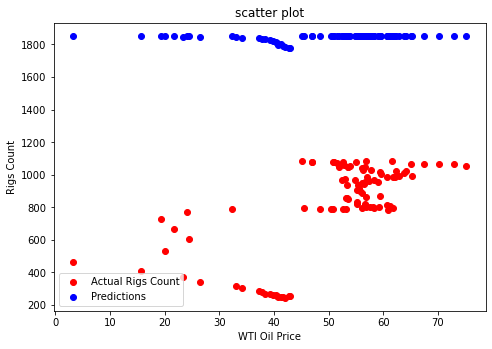

In [44]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
test_2 = test.reset_index()
ax.scatter(test_2['WTI_Oil_Price'], test_2['Rigs_Count'], color='r',label = "Actual Rigs Count")
ax.scatter(test_2['WTI_Oil_Price'], test_2['Predictions'], color='b', label = "Predictions")
ax.set_xlabel('WTI Oil Price')
ax.set_ylabel('Rigs Count')
ax.set_title('scatter plot')
plt.legend()
plt.show()